## 3 記述統計と単回帰分析
データの傾向を明らかにする手法として統計解析の基本と学ぶ

### 3-1 統計解析の種類

記述統計

推論統計


#### ライブラリのインポート

In [4]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series
from pandas import DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 少数第3位まで表示
%precision 3


'%.3f'

### 3-2 データの読み込みと対話

In [5]:
# zipをダウンロードするためのライブラリ

import requests
import zipfile
from io import StringIO
import io

In [6]:
# zipのダウンロードと展開
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
req = requests.get(url, stream=True)
zip = zipfile.ZipFile(io.BytesIO(req.content))
zip.extractall('./student/')

In [7]:
# データの読み込み
student_data_math = pd.read_csv('./student/student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 3-2-3 データの性質の確認

データのカラム情報を確認する

In [8]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 3-2-4 量的データと質的データ

In [9]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

## 3-3 記述統計

### 3-3-1 ヒストグラム

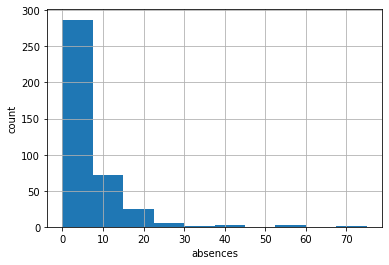

In [10]:
plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

<AxesSubplot:xlabel='absences', ylabel='Count'>

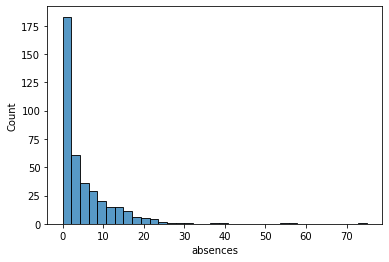

In [11]:
sns.histplot(data=student_data_math, x='absences')

In [12]:
# 平均値
print('平均値:', student_data_math['absences'].mean())

# 中央値
print('中央値:', student_data_math['absences'].median())

# 最頻値
print('最頻値:', student_data_math['absences'].mode())

平均値: 5.708860759493671
中央値: 4.0
最頻値: 0    0
dtype: int64


### 3-3-3 分散と標準偏差

In [13]:
# 分散
print('分散:', student_data_math['absences'].var(ddof=0))

# 標準偏差
print('標準偏差:', student_data_math['absences'].std(ddof=0))

分散: 63.887389841371565
標準偏差: 7.99295876640006


### 3-3-4 要約統計量とパーセンタイル値

In [14]:
# 要約統計量施方位
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

#### 四方位範囲とは
75%タイルと25%タイルの差分のこと

In [15]:
# 四方位範囲を求める
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

### 3-3-5 箱ひげ図

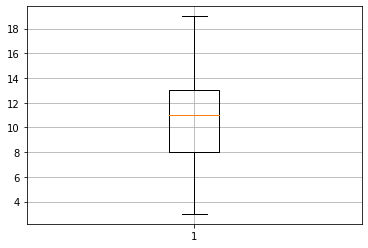

In [21]:
# matplot版
plt.boxplot(student_data_math['G1'])
plt.grid(True)

<AxesSubplot:>

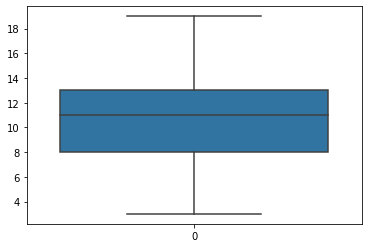

In [19]:
# seaborn版
sns.boxplot(data=student_data_math['G1'])

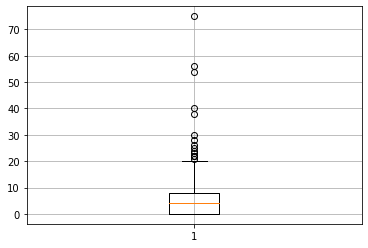

In [22]:
# matplot版
plt.boxplot(student_data_math['absences'])
plt.grid(True)

<AxesSubplot:>

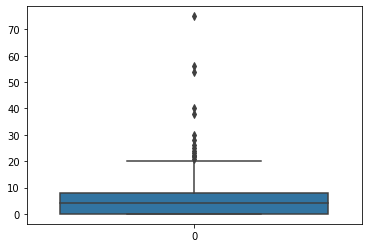

In [23]:
# seaborn版
sns.boxplot(data=student_data_math['absences'])

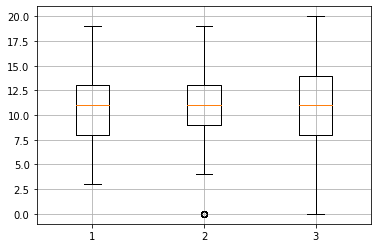

In [27]:
# matplot版
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

<AxesSubplot:>

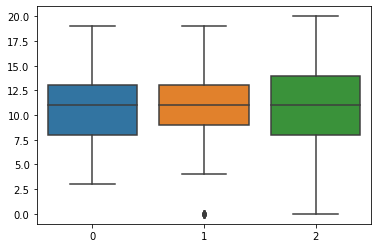

In [28]:
# seaborn版
sns.boxplot(data=[student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])

### 3-3-6 変動係数

$$
CV = \frac{\sigma}{\bar{x}}
$$

In [31]:
sigma = student_data_math['absences'].std()
x = student_data_math['absences'].mean()
sigma / x

1.4018726369879073